In [1]:
# https://drive.google.com/file/d/1YdtK0Jif5sjehcCVpyL5xIeUb-MuYb_O/view?usp=sharing

In [2]:
!unzip '/content/drive/MyDrive/data/kaggle/porto-seguro-safe-driver-prediction.zip'

Archive:  /content/drive/MyDrive/data/kaggle/porto-seguro-safe-driver-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd

In [4]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

In [5]:
train.shape, test.shape, submission.shape

((595212, 59), (892816, 58), (892816, 2))

In [6]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [7]:
train['target'].value_counts()

,count
target,
0,573518
1,21694


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

<Axes: >

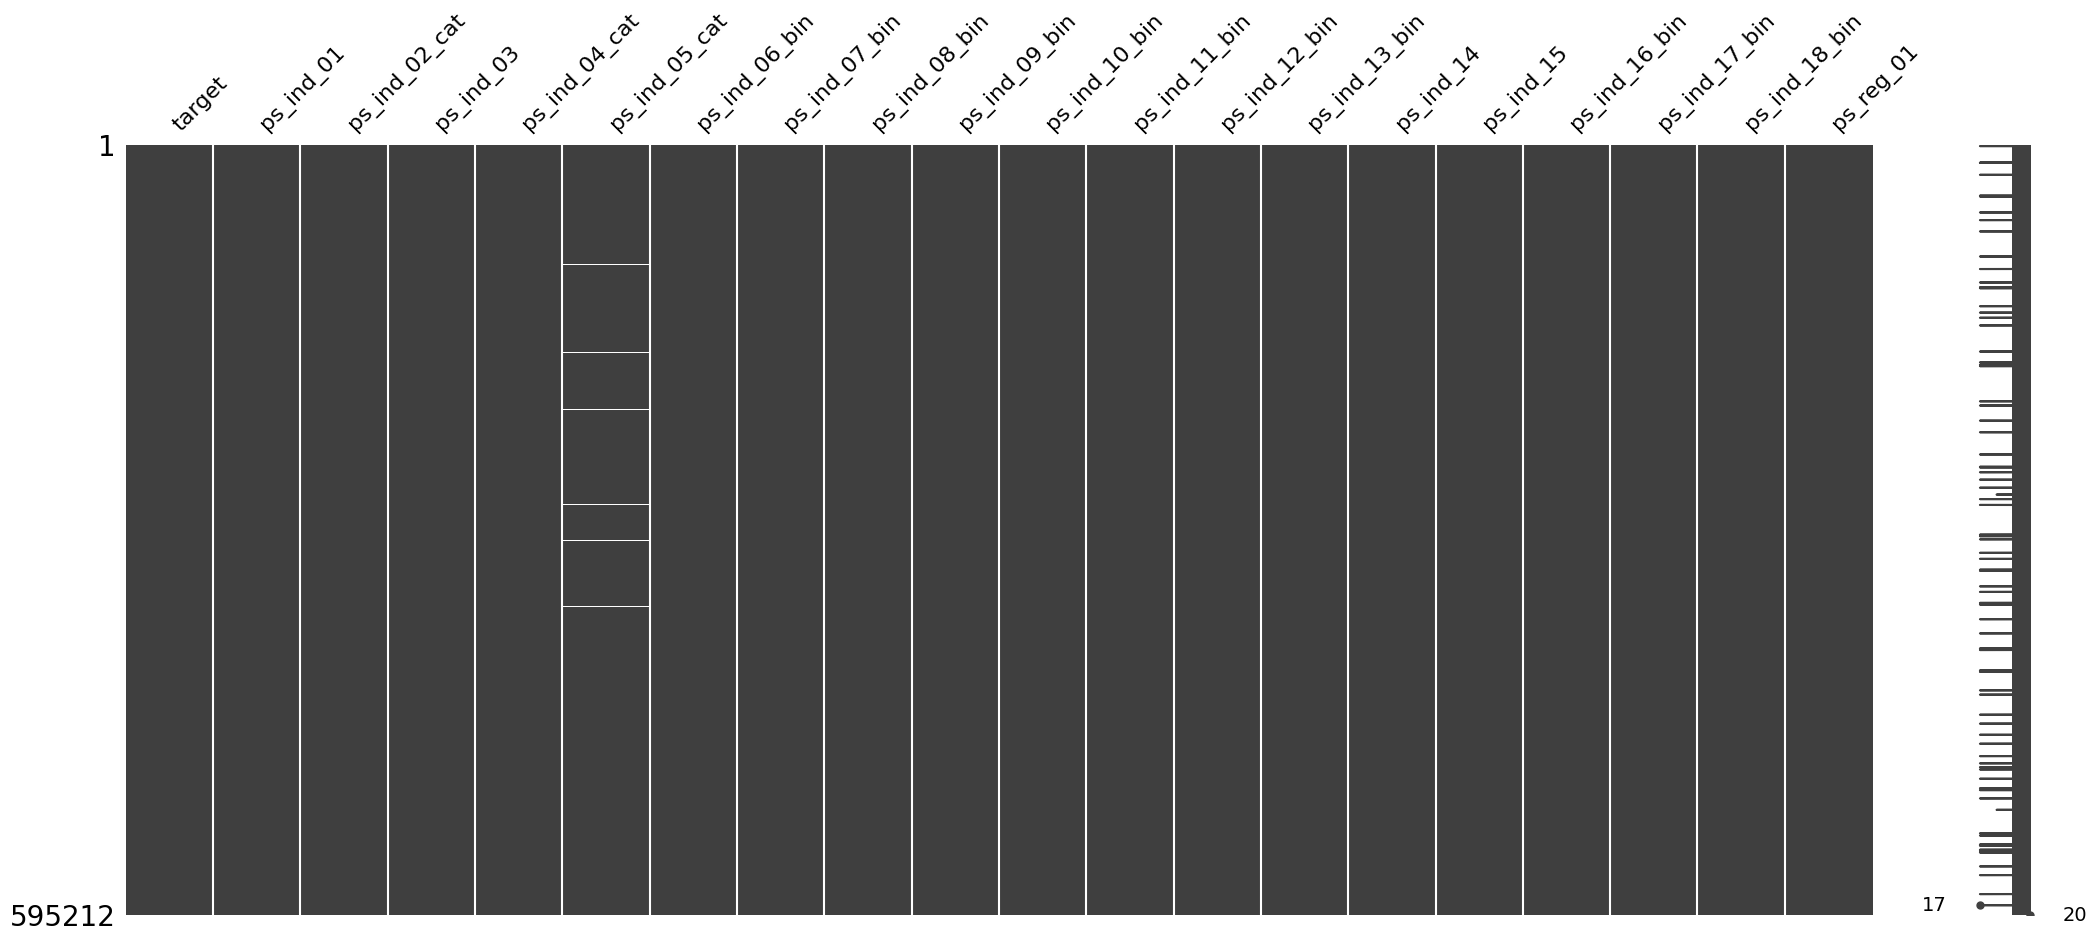

In [9]:
# 결측치를 -1로 셋팅되어 있다
# -1을 np.nan으로 변경
import missingno
import numpy as np
train_copy = train.iloc[:,1:]
train_copy = train_copy.replace(-1, np.nan)
missingno.matrix(train_copy.iloc[:,:20])

<Axes: >

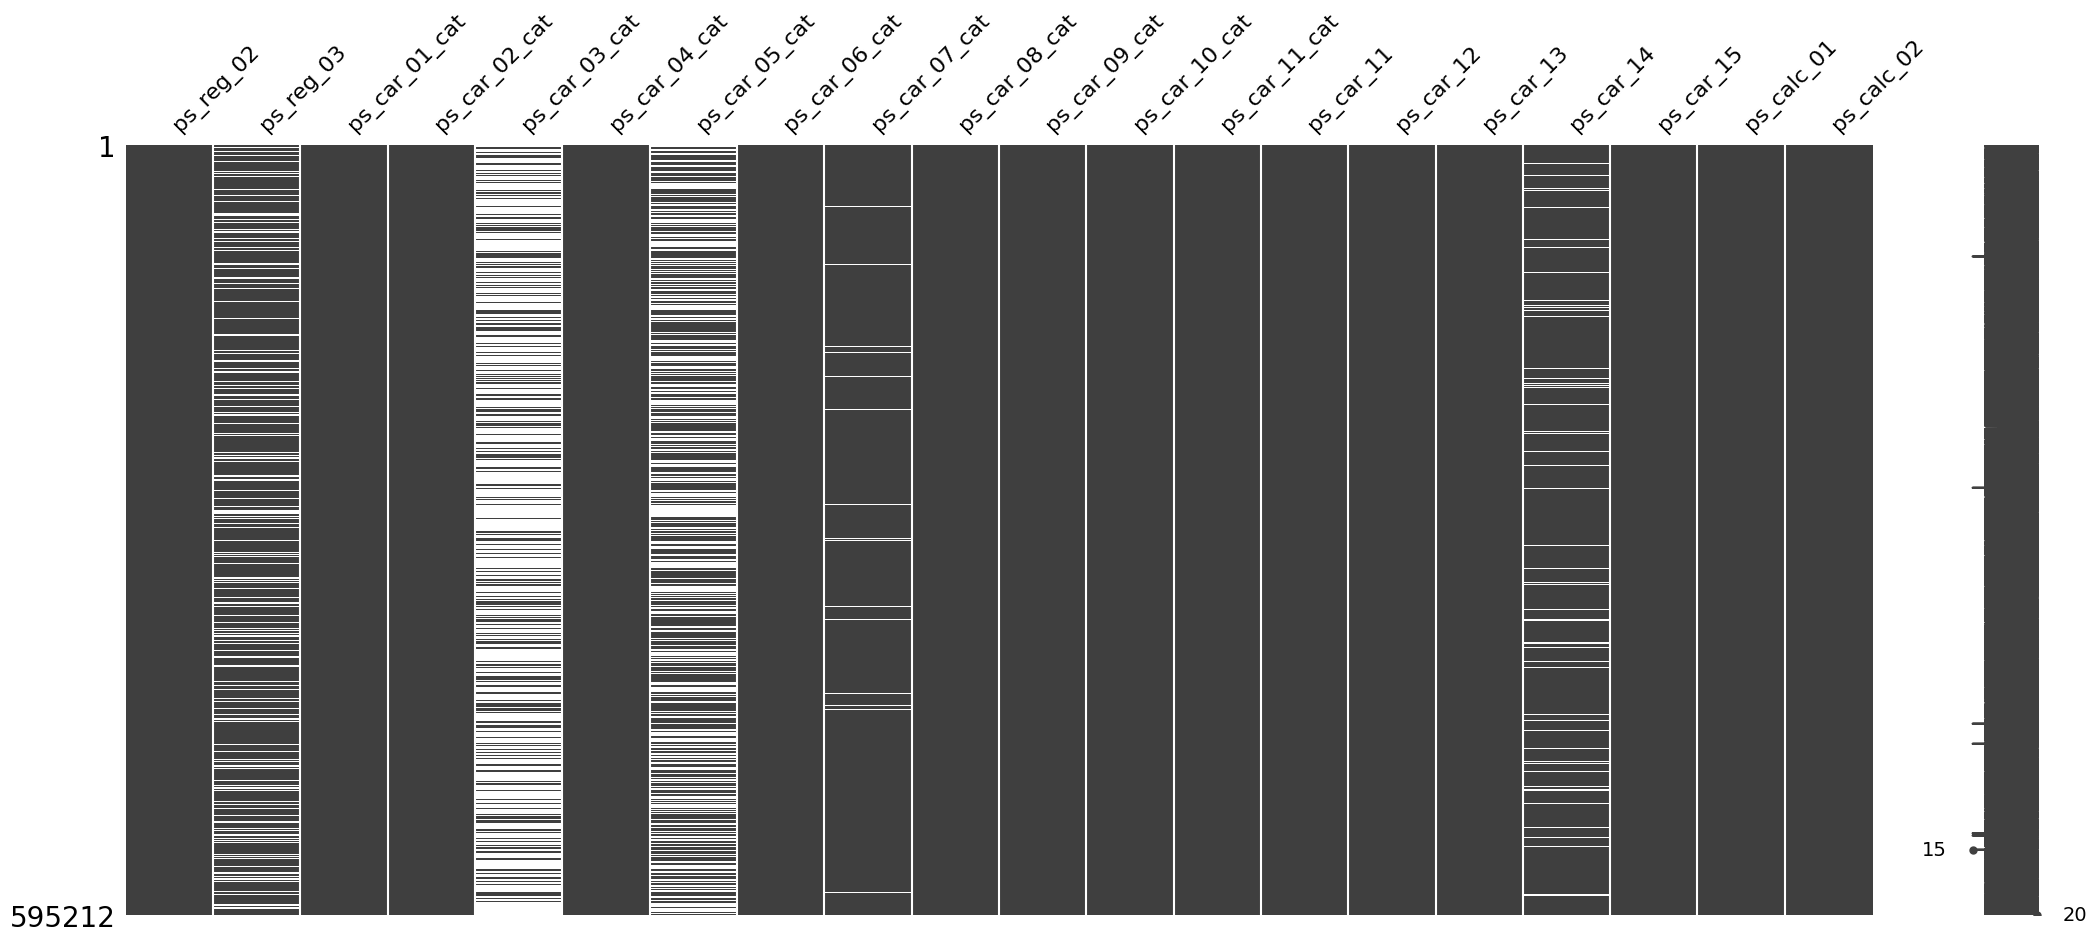

In [10]:
missingno.matrix(train_copy.iloc[:,20:40])

<Axes: >

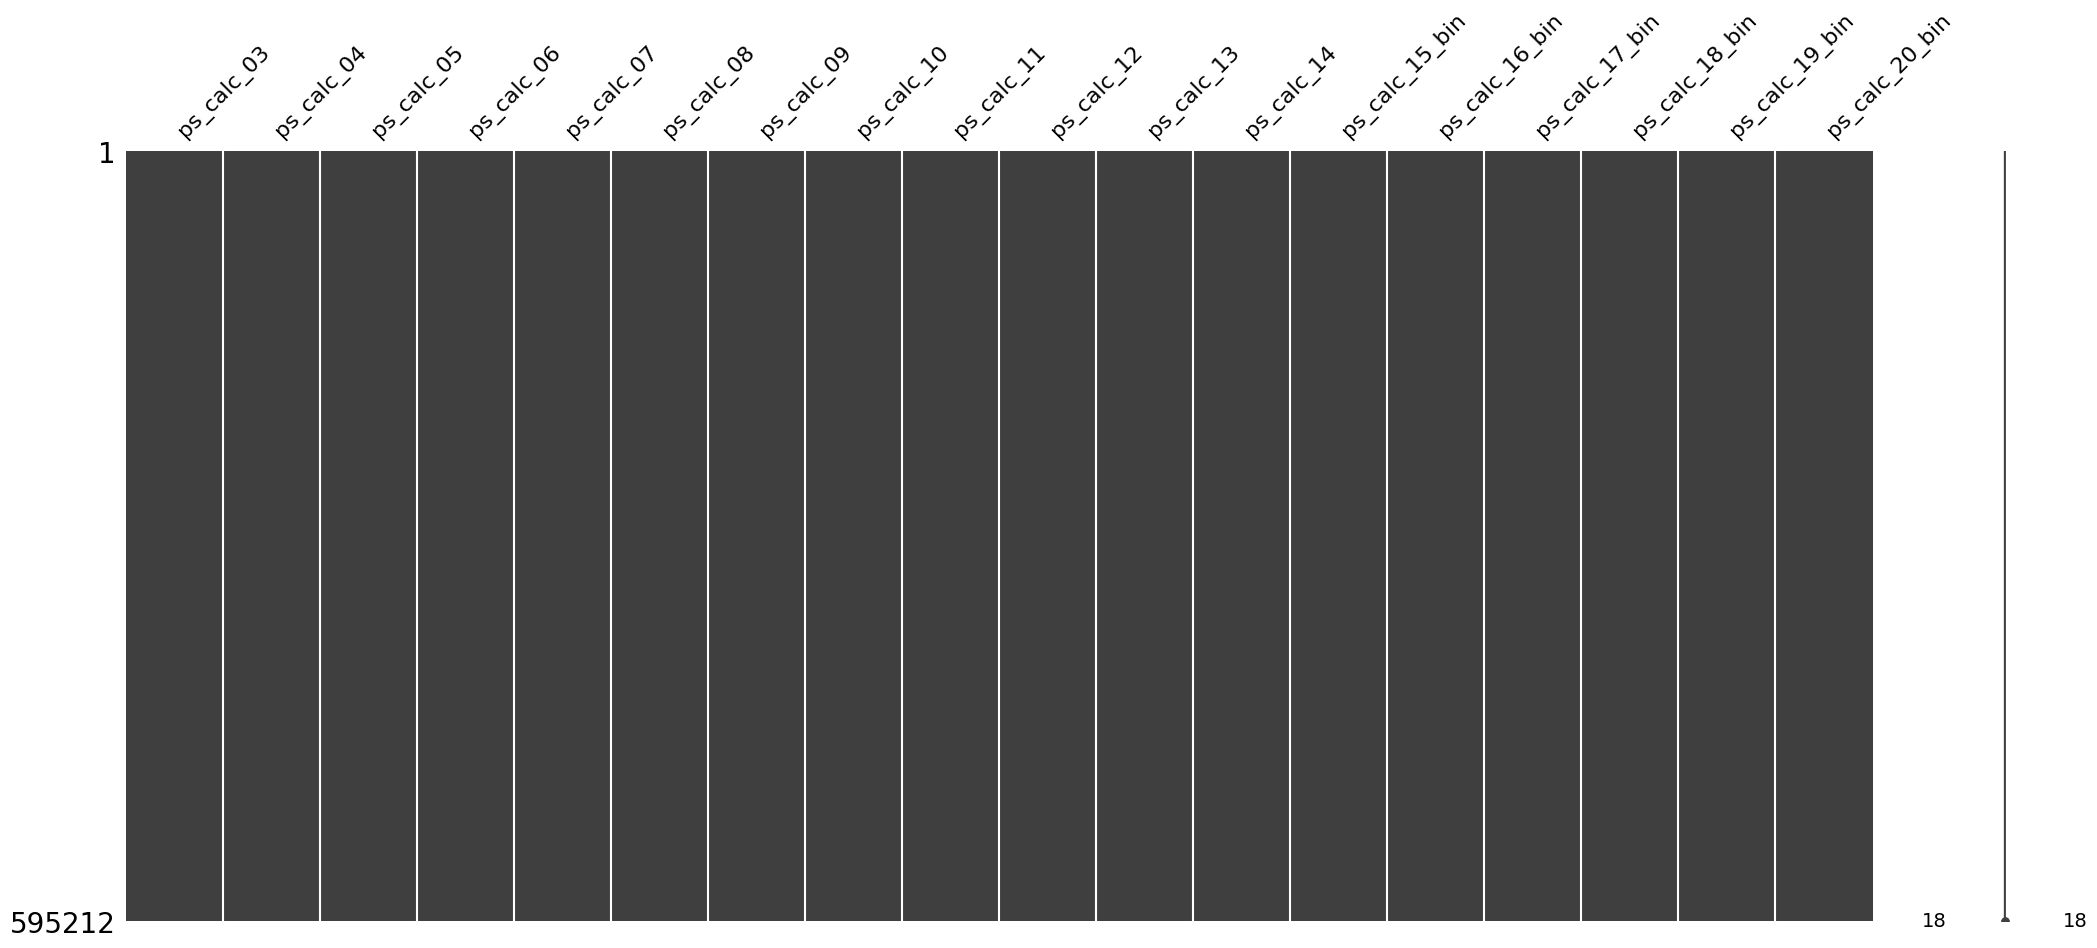

In [11]:
missingno.matrix(train_copy.iloc[:,40:60])

In [12]:
train_copy.columns

Index(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      

In [13]:
import pandas as pd
summary = pd.DataFrame(train_copy.dtypes, columns=['테이터 타입'])
summary['결측값 개수'] = train_copy.isnull().sum()
summary['고유값 개수'] = train_copy.nunique()
summary['데이터 종류'] = np.nan
for col in  train_copy.columns:
  if 'bin' in col or col == 'target':
    summary.loc[col,'데이터 종류'] = '이진형'
  elif 'cat' in col:
    summary.loc[col,'데이터 종류'] = '명목형'
  elif train_copy[col].dtype == 'float':
    summary.loc[col,'데이터 종류'] = '연속형'
  elif train_copy[col].dtype == 'int':
    summary.loc[col,'데이터 종류'] = '순서형'

summary

<ipython-input-13-43945ab8f103>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '이진형' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summary.loc[col,'데이터 종류'] = '이진형'


,테이터 타입,결측값 개수,고유값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,float64,216,4,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,float64,83,2,명목형
ps_ind_05_cat,float64,5809,7,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


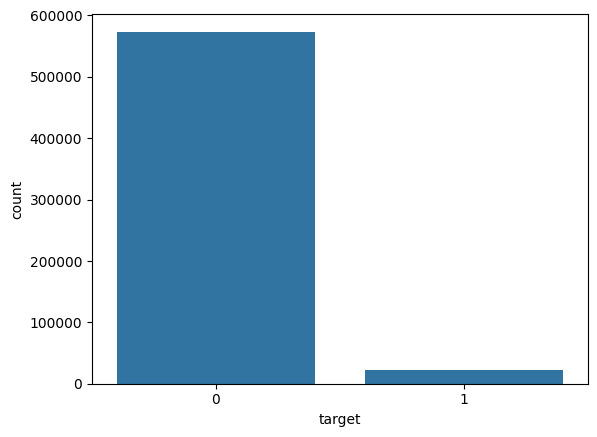

In [14]:
# 타겟의 비율
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='target', data=train_copy)
plt.show()

피처엔지니어링

In [15]:
# 데이터 합치기
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1)
all_data.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,9,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,13,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,16,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [16]:
all_data.columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtyp

In [17]:
# 명목형 피처는 원핫  one-hot
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_col = [col for col in all_data.columns if 'cat' in col]
cat_col_encoding =  ohe.fit_transform(all_data[cat_col])
cat_col_encoding


<1488028x184 sparse matrix of type '<class 'numpy.float64'>'
	with 20832392 stored elements in Compressed Sparse Row format>

제거할 피처가 있는지 확인

In [18]:
correlation_matrix =  all_data.corr()  # 상관계수구하기
threshold = 0.8   # 임계치
np.where(np.abs(correlation_matrix) > 0.7)  # 상관계수의 절대값을 구한다
# 변수끼리 상관지수가 높은 피처는 없음

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 12, 13, 14, 14,
        15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
        49, 50, 51, 52, 53, 54, 55, 56, 57]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 13, 12, 14,
        15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
        49, 50, 51, 52, 53, 54, 55, 56, 57]))

In [19]:
# 명목형 피처는 one-hot으로 인코딩
# 기존 명목형 피처제거하고 one-hot된 피처들을 합친다
from scipy import sparse
all_data2 = all_data.drop(cat_col, axis=1)
all_data.sprs = sparse.hstack((all_data2, cat_col_encoding),format='csr')

<ipython-input-19-77f34ad9a865>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  all_data.sprs = sparse.hstack((all_data2, cat_col_encoding),format='csr')


In [20]:
# 데이터 나누기( 학습용과 검증용을 합쳤기때문에)
num_train = len(train)
X = all_data.sprs[:num_train]
X_test = all_data.sprs[num_train:]
y = train['target']

In [21]:
import numpy as np
# 주로 불균형 데이터셋에서 모델 성능을 평가하는데 사용
# 완벽한 예측인 경우 지니계수는 1에 가까운 값
# 무작위 예측일 경우 0에 가까운 값
def eval_gini(y_true, y_pred):
    # 실제값과 예측값의 크기가 같은지 확인 (값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0]                      # 데이터 개수
    L_mid = np.linspace(1 / n_samples, 1, n_samples) # 대각선 값

    # 1) 예측값에 대한 지니계수
    pred_order = y_true[y_pred.argsort()] # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) # 로렌츠 곡선
    G_pred = np.sum(L_mid - L_pred)       # 예측 값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수
    true_order = y_true[y_true.argsort()] # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order) # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true)       # 예측이 완벽할 때 지니계수

    # 정규화된 지니계수
    return G_pred / G_true

In [22]:
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True

모델 훈련 / 검증

In [23]:
from sklearn.model_selection import StratifiedKFold  # 불균형 데이터셋일때 타겟의 라벨분포를 고려해서 폴드를 분할
from lightgbm import LGBMClassifier  # 트리 기반의 모델
import lightgbm

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [24]:
# oof 방식 : out ouf fold  모델의 성능을 평가하거나, 앙상블 모델을 만들때 사용
# 교차검증할때 훈련되지 않은 데이터를 이용해서 예측값을 생성하는 방법
# 과적합을 피할수 있고 일반화  성능을 평가하는데 이용
oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])

In [31]:
import lightgbm as lgb
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

params = {'objective': 'binary',
          'learning_rate': 0.01,
          'force_row_wise': True,
          'random_state': 0}

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)

    # 훈련용 데이터, 검증용 데이터 설정
    X_train, y_train = X[train_idx], y[train_idx] # 훈련용 데이터
    X_valid, y_valid = X[valid_idx], y[valid_idx] # 검증용 데이터

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train, y_train) # LightGBM 전용 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid, y_valid) # LightGBM 전용 검증 데이터셋

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params=params,        # 훈련용 하이퍼파라미터
                          train_set=dtrain,     # 훈련 데이터셋
                          num_boost_round=1000, # 부스팅 반복 횟수
                          valid_sets=dvalid,    # 성능 평가용 검증 데이터셋
                          feval=gini,           # 검증용 평가지표
                          callbacks=[lgb.early_stopping(stopping_rounds=100)], # 조기종료 조건
                          )

    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits

    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)

######################################## 폴드 1 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1800
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 227
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds


KeyboardInterrupt: 

In [35]:
# 검증 데이터 예측 확률에 대한 정규화 지니계수
gini_score = eval_gini(y_valid.reset_index(drop=True), oof_val_preds[valid_idx])
print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

폴드 1 지니계수 : 0.28727450582263253



,target
0,0
1,0
2,0
3,1
4,0
...,...
119038,0
119039,0
119040,0
119041,0


In [30]:
len(oof_val_preds[valid_idx]), y_valid.shape

(119043, (119043,))

In [ ]:
print(f'oof 검증 데이터 지니계수 : {eval_gini(y, oof_val_preds)}')